In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('Hyderbad_House_price.csv')

In [4]:
df.head()

,Unnamed: 0,title,location,price(L),rate_persqft,area_insqft,building_status
0,0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction


In [5]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [6]:
df.head()

,title,location,price(L),rate_persqft,area_insqft,building_status
0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction


In [11]:
X

,rate_persqft,area_insqft,title_1 BHK Independent House,title_1 RK Studio Apartment,title_10 BHK Independent House,title_2 BHK Apartment,title_2 BHK Independent Floor,title_2 BHK Independent House,title_2 BHK Villa,title_3 BHK Apartment,...,location_Yadagirigutta,location_Yapral,location_Yousufguda,location_Zaheerabad,location_financial District,location_muthangi,location_raidurgam,building_status_Ready to move,building_status_Resale,building_status_Under Construction
0,6000,1805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5500,1560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5200,1070,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4999,1210,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5999,1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,6000,1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3656,3250,2000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3657,6500,1000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3658,5500,1000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['title', 'location', 'building_status']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
data = df.drop(columns=categorical_cols)
X = data.drop(columns=['price(L)'])
y = data['price(L)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
print("model score", model.score(X_train,y_train))
# 📌 Predictions
y_pred = model.predict(X_test)

# 📌 Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

model score 0.6169176471723448


In [33]:
r2

0.6849916575264381

In [14]:
r2

0.7773901925037645

In [15]:
print("mae", mae)
print("mse",mse)
print("rmse",rmse)

mae 36.76423441616422
mse 8452.04859064566
rmse 91.93502374310707


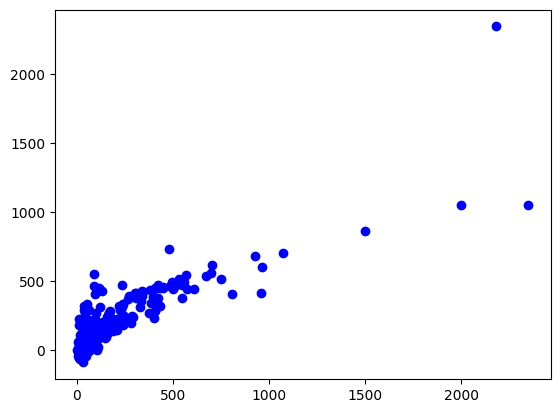

In [22]:
plt.scatter(y_test, y_pred, color='blue', label="Predictions")  # Scatter for predicted vs actual


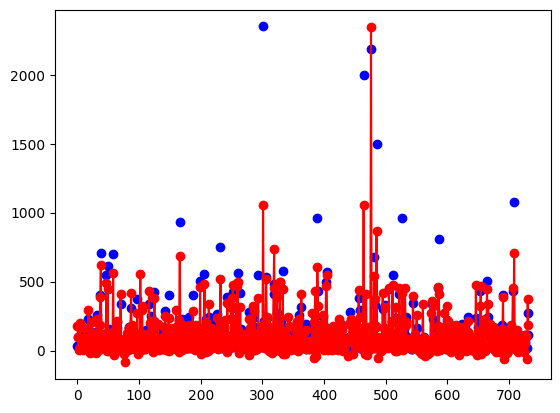

In [29]:
# Plot actual test values
plt.plot(range(len(y_test)), y_test, color='blue', marker='o', linestyle='', label="Actual Prices")

# Plot predicted values
plt.plot(range(len(y_pred)), y_pred, color='red', marker='o', linestyle='-', label="Predicted Prices")




In [19]:
residuals=y_test-y_pred

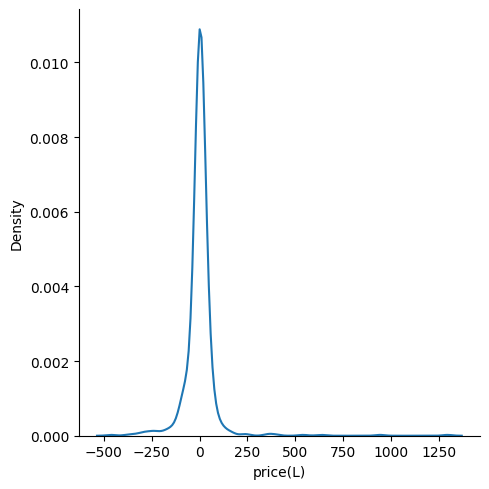

In [20]:
import seaborn as sns 

sns.displot(residuals,kind="kde")

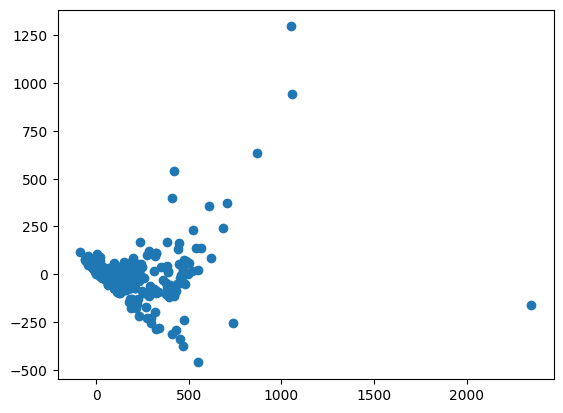

In [21]:
plt.scatter(y_pred,residuals)


In [30]:
pd.head()

AttributeError: module 'pandas' has no attribute 'head'

In [31]:
X_train.head()

,rate_persqft,area_insqft,title_1 BHK Independent House,title_1 RK Studio Apartment,title_10 BHK Independent House,title_2 BHK Apartment,title_2 BHK Independent Floor,title_2 BHK Independent House,title_2 BHK Villa,title_3 BHK Apartment,...,location_Yadagirigutta,location_Yapral,location_Yousufguda,location_Zaheerabad,location_financial District,location_muthangi,location_raidurgam,building_status_Ready to move,building_status_Resale,building_status_Under Construction
1966,1022,1062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570,5045,1100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3388,4093,1700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
343,2222,1800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3408,4615,2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# 📌 Sample Data (Assuming df is already loaded)
categorical_cols = ['title', 'location', 'building_status']
numerical_cols = ['rate_persqft', 'area_insqft']

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown="ignore")  # Handle unseen categories
df = pd.read_csv('Hyderbad_House_price.csv')
# 📌 Encode categorical columns
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# 📌 Prepare the dataset
df_processed = df.drop(columns=categorical_cols)
df_processed = pd.concat([df_processed, encoded_df], axis=1)

X = df_processed.drop(columns=['price(L)'])
y = df_processed['price(L)']

# 📌 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Train model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model score", model.score(X_train,y_train))
# 📌 Function to Predict House Price
def predict_house_price(title, location, rate_persqft, area_insqft, building_status):
    # 📌 Create a DataFrame for new input
    new_data = pd.DataFrame({
        'title': [title],
        'location': [location],
        'rate_persqft': [rate_persqft],  # Numerical column
        'area_insqft': [area_insqft],    # Numerical column
        'building_status': [building_status]
    })

    # 📌 Encode categorical columns
    encoded_new_data = pd.DataFrame(encoder.transform(new_data[categorical_cols]), 
                                    columns=encoder.get_feature_names_out(categorical_cols))

    # 📌 Extract numerical features
    numerical_new_data = new_data[numerical_cols]

    # 📌 Merge numerical and encoded categorical features
    final_input = pd.concat([numerical_new_data, encoded_new_data], axis=1)

    # 📌 Ensure correct column order (match training data)
    final_input = final_input.reindex(columns=X_train.columns, fill_value=0)

    # 📌 Predict house price
    predicted_price = model.predict(final_input)[0]

    return round(predicted_price, 2)

# 📌 Example Usage
title = '3 BHK Apartment'
location = 'Kondapur'
rate_persqft = 8688
area_insqft = 1915
building = 'Under Construction'
predicted_price = predict_house_price(title,location , rate_persqft, area_insqft, building)
print(f"Predicted Price (Lakh): {predicted_price}")


Model score 0.8722928342154739
Predicted Price (Lakh): 170.52
